# Student Result Analysis

### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data load and see insights

In [4]:
df = pd.read_csv("Student_results.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Data Transformation

### Drop unnamed column

In [5]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


## Scores Analysis based on different parameters

### Average Scores by Test Preparation

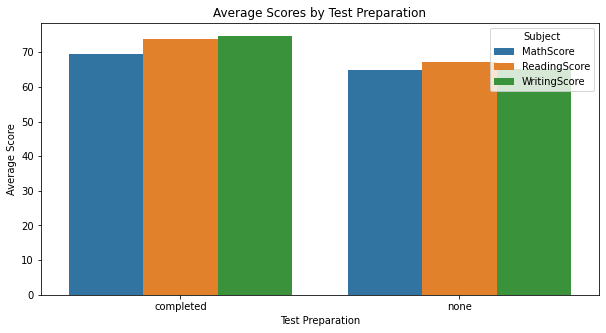

In [60]:
test_prep_scores = df.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
test_prep_scores = pd.melt(test_prep_scores, id_vars='TestPrep', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=test_prep_scores, x='TestPrep', y='Average Score', hue='Subject')
plt.title("Average Scores by Test Preparation")
plt.xlabel("Test Preparation")
plt.ylabel("Average Score")
plt.show()

In [66]:
# Students who completed test preparation tend to have higher average scores.

### Average Scores by Lunch Type

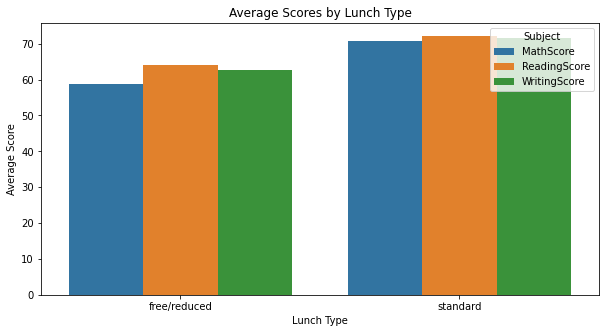

In [62]:
lunch_scores = df.groupby('LunchType')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
lunch_scores = pd.melt(lunch_scores, id_vars='LunchType', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=lunch_scores, x='LunchType', y='Average Score', hue='Subject')
plt.title("Average Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.show()


In [65]:
# In general, students who have a standard lunch tend to have a higher average score 
# compared to students who have a free/reduced lunch.

### Average Scores: First Child vs. Other Siblings

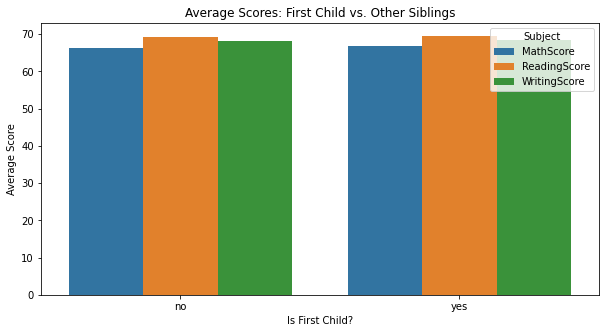

In [63]:
first_child_scores = df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
first_child_scores = pd.melt(first_child_scores, id_vars='IsFirstChild', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=first_child_scores, x='IsFirstChild', y='Average Score', hue='Subject')
plt.title("Average Scores: First Child vs. Other Siblings")
plt.xlabel("Is First Child?")
plt.ylabel("Average Score")
plt.show()

In [64]:
# The analysis suggests that there is no significant effect of having siblings on student scores.

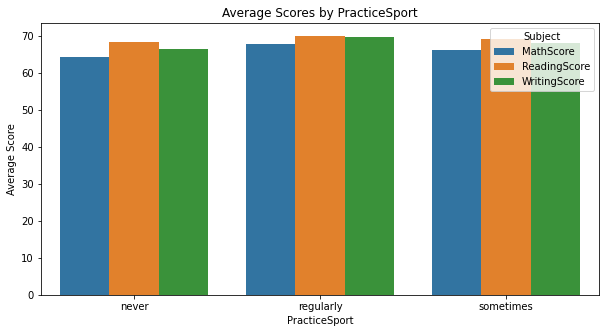

In [82]:
practice_sport_scores = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
practice_sport_scores = pd.melt(practice_sport_scores, id_vars='PracticeSport', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=practice_sport_scores, x='PracticeSport', y='Average Score', hue='Subject')
plt.title("Average Scores by PracticeSport")
plt.xlabel("PracticeSport")
plt.ylabel("Average Score")
plt.show()

In [88]:
# Students who regularly practice sports tend to have better average scores 
# compared to those who do not participate in sports

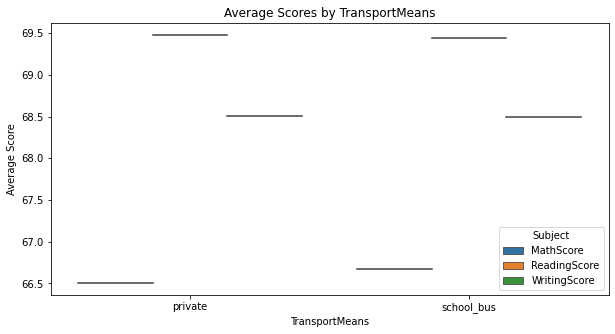

In [87]:
transport_means_scores = df.groupby('TransportMeans')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
transport_means_scores = pd.melt(transport_means_scores, id_vars='TransportMeans', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.violinplot(data=transport_means_scores, x='TransportMeans', y='Average Score', hue='Subject')
plt.title("Average Scores by TransportMeans")
plt.xlabel("TransportMeans")
plt.ylabel("Average Score")
plt.show()

In [90]:
# The mode of transportation (TransportMeans) does not show a significant impact on student average scores

## Parent's effect on Student's Education

### Parent Education

In [8]:
gb_parentEdu = df.groupby("ParentEduc").agg({"MathScore":'mean', "MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb_parentEdu)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


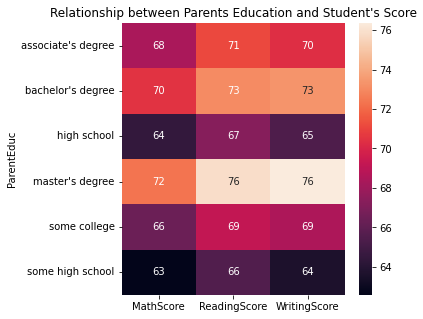

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(gb_parentEdu, annot = True)
plt.title("Relationship between Parents Education and Student's Score")
plt.show()

In [67]:
# from this above chart we have concluded that
# the education of the parents have a good impact on their child's education (scores)

### Parent Marital Status

In [10]:
gb_parentMarital = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb_parentMarital)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


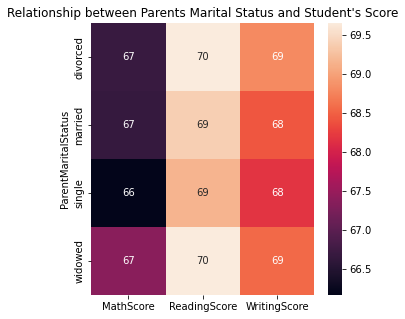

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(gb_parentMarital, annot = True)
plt.title("Relationship between Parents Marital Status and Student's Score")
plt.show()

In [16]:
# from this above chart we have concluded that
# there is no/negligible impact on the students score due to their parent's  marital status  

## Individual Score Analysis

<AxesSubplot:xlabel='MathScore'>

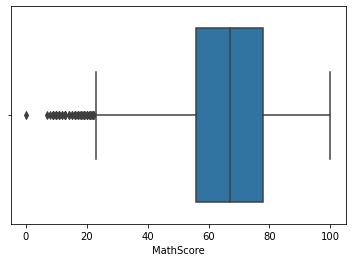

In [23]:
sns.boxplot(data = df, x = "MathScore")

<AxesSubplot:xlabel='ReadingScore'>

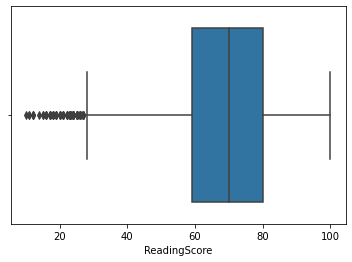

In [22]:
sns.boxplot(data = df, x = "ReadingScore")

<AxesSubplot:xlabel='WritingScore'>

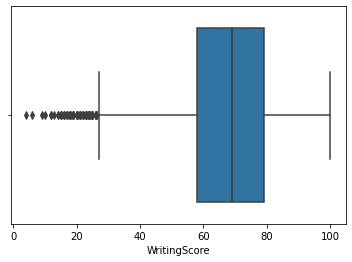

In [20]:
sns.boxplot(data = df, x = "WritingScore")

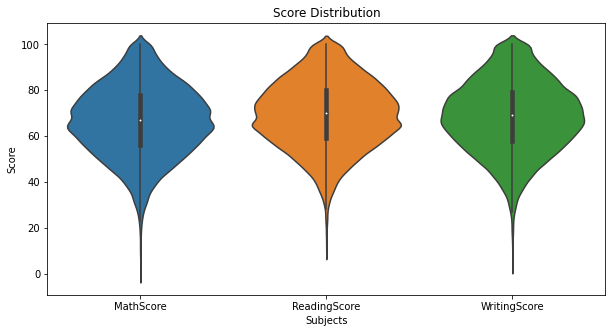

In [79]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title("Score Distribution")
plt.xlabel("Subjects")
plt.ylabel("Score")
plt.show()

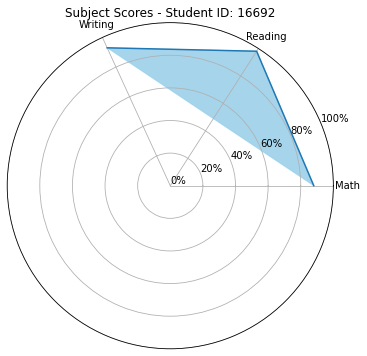

In [75]:
categories = ['Math', 'Reading', 'Writing']
values = student_scores_percent.values.tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(categories, values, alpha=0.25)
ax.plot(categories, values)
ax.set_title(f"Subject Scores - Student ID: {student_id}")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax.fill(categories, values, color='skyblue', alpha=0.5)

plt.show()

In [76]:
# The analysis of average scores suggests that 
# math is relatively more challenging compared to other subjects.

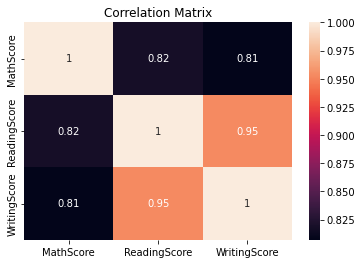

In [53]:
correlation_matrix = df[['MathScore', 'ReadingScore', 'WritingScore', 'WklyStudyHours']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [77]:
# However, the correlation between weekly study hours and scores is relatively weak, 
# indicating that studying more hours per week does not strongly guarantee higher scores.

## Gender Distribution

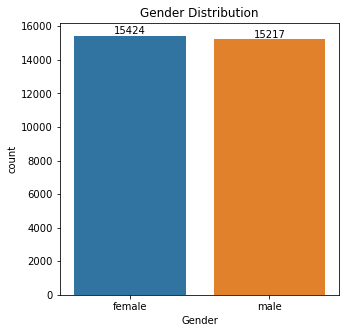

In [12]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [68]:
# from the above chart we have analysed that:
# the number of females in the data is more than the number of males

### Average Scores by Gender

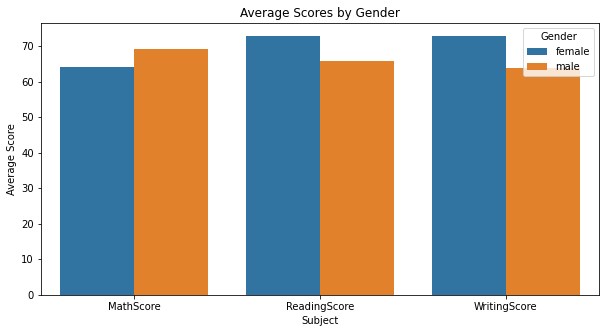

In [69]:
gender_scores = df.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
gender_scores = pd.melt(gender_scores, id_vars='Gender', value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=gender_scores, x='Subject', y='Average Score', hue='Gender')
plt.title("Average Scores by Gender")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.show()


In [72]:
# In this dataset, females have a higher average score in reading and writing, 
# while males have a higher average score in math.

## Ethnic Groups Distribution

In [25]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


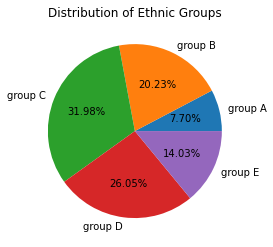

In [52]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

label_mlist = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
# print(mlist)

plt.pie(mlist, labels = label_mlist, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

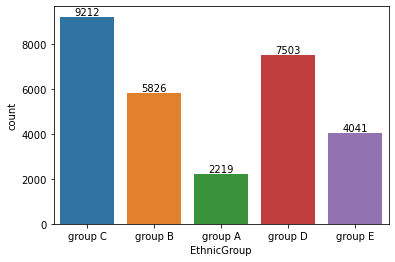

In [46]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

### Ethnic Group Distribution by Parent Education

<Figure size 720x360 with 0 Axes>

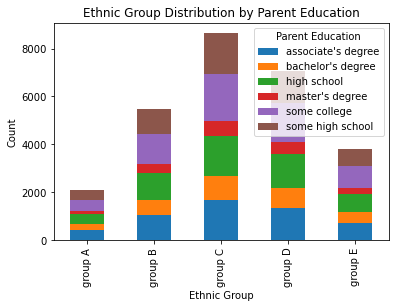

In [81]:
eth_parent_edu = pd.crosstab(df['EthnicGroup'], df['ParentEduc'])

plt.figure(figsize=(10, 5))
eth_parent_edu.plot(kind='bar', stacked=True)
plt.title("Ethnic Group Distribution by Parent Education")
plt.xlabel("Ethnic Group")
plt.ylabel("Count")
plt.legend(title="Parent Education")
plt.show()

### Average Scores by Ethnic Group

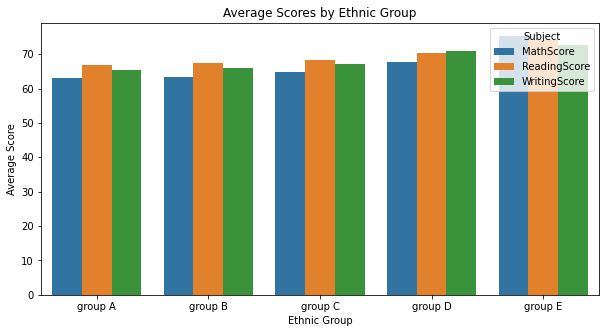

In [58]:
subject_columns = ['MathScore', 'ReadingScore', 'WritingScore']
ethnic_group_scores = df.groupby('EthnicGroup')[subject_columns].mean().reset_index()
ethnic_group_scores = pd.melt(ethnic_group_scores, id_vars='EthnicGroup', value_vars=subject_columns, var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 5))
sns.barplot(data=ethnic_group_scores, x='EthnicGroup', y='Average Score', hue='Subject')
plt.title("Average Scores by Ethnic Group")
plt.xlabel("Ethnic Group")
plt.ylabel("Average Score")
plt.show()

In [78]:
# In the student result dataset, it can be concluded that 
# Ethnic Group A has the lowest average scores across subjects, while Ethnic Group E has the highest average scores.

## Conclusion 

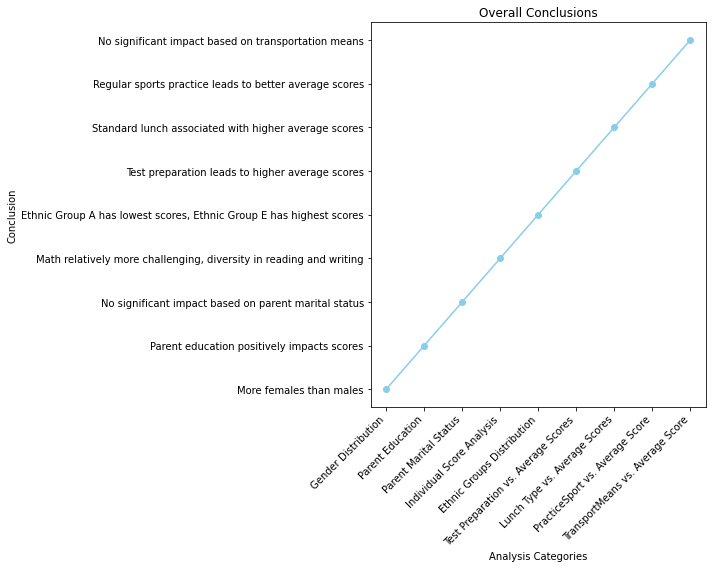

In [102]:
conclusion_labels = ['Gender Distribution', 'Parent Education', 'Parent Marital Status', 'Individual Score Analysis', 'Ethnic Groups Distribution', 'Test Preparation vs. Average Scores', 'Lunch Type vs. Average Scores', 'PracticeSport vs. Average Score', 'TransportMeans vs. Average Score']
conclusion_values = ['More females than males', 'Parent education positively impacts scores', 'No significant impact based on parent marital status', 'Math relatively more challenging, diversity in reading and writing', 'Ethnic Group A has lowest scores, Ethnic Group E has highest scores', 'Test preparation leads to higher average scores', 'Standard lunch associated with higher average scores', 'Regular sports practice leads to better average scores', 'No significant impact based on transportation means']

plt.figure(figsize=(10, 8))
plt.plot(conclusion_labels, conclusion_values, marker='o', linestyle='-', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Overall Conclusions")
plt.xlabel("Analysis Categories")
plt.ylabel("Conclusion")
plt.tight_layout()
plt.show()
